In [417]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
import itertools
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report


%matplotlib inline

In [418]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [419]:
# Importing the dataset

train_df = pd.read_csv('train_data.csv', low_memory=False)
test_df = pd.read_csv('test_data.csv', low_memory=False)

In [422]:
train_df["Reached.on.Time_Y.N"] = train_df["Reached.on.Time_Y.N"].map({0:"Yes",1:"No"})

In [423]:
train_df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,No
1,2,F,Flight,4,5,216,2,low,M,59,3088,No
2,3,A,Flight,2,2,183,4,low,M,48,3374,No
3,4,B,Flight,3,3,176,4,medium,M,10,1177,No
4,5,C,Flight,2,2,184,3,medium,F,46,2484,No
5,6,F,Flight,3,1,162,3,medium,F,12,1417,No
6,7,D,Flight,3,4,250,3,low,F,3,2371,No
7,8,F,Flight,4,1,233,2,low,F,48,2804,No
8,9,A,Flight,3,4,150,3,low,F,11,1861,No
9,10,B,Flight,3,2,164,3,medium,F,29,1187,No


In [424]:
test_df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,A,Road,3,4,168,3,low,M,5,1841,NaN
1,2,B,Road,5,3,159,2,low,F,58,1990,NaN
2,3,C,Road,2,2,282,3,medium,F,42,3193,NaN
3,4,F,Road,4,3,278,4,high,M,37,3248,NaN
4,5,D,Road,6,4,256,5,low,F,6,3149,NaN
5,6,F,Road,4,1,97,4,medium,F,17,1204,NaN
6,7,A,Road,2,1,136,3,high,F,35,1801,NaN
7,8,B,Road,4,5,128,4,medium,F,7,1940,NaN
8,9,C,Road,3,5,114,3,high,M,3,1974,NaN
9,10,F,Road,2,1,137,4,medium,F,4,1185,NaN


In [425]:
# droping test_df last coloumn beacuse it has nan values 
test_df = test_df.drop("Reached.on.Time_Y.N", axis=1)

# droping id columns in both data frames bcoz its unique values
test_df = test_df.drop("ID", axis=1)
train_df = train_df.drop("ID", axis=1)


In [426]:
print(train_df.shape)
print(test_df.shape)

(10999, 11)
(3993, 10)


train data has 10999 rows and 11 columns 
test data has 3993 rows and 10 columns

### Check Missing Data 

In [427]:
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

In [428]:
missing_data(train_df) # missing data for train

,Total,Percent,Data_Type
Reached.on.Time_Y.N,0,0.0,object
Weight_in_gms,0,0.0,int64
Discount_offered,0,0.0,int64
Gender,0,0.0,object
Product_importance,0,0.0,object
Prior_purchases,0,0.0,int64
Cost_of_the_Product,0,0.0,int64
Customer_rating,0,0.0,int64
Customer_care_calls,0,0.0,int64
Mode_of_Shipment,0,0.0,object


In [429]:
missing_data(test_df) # missing data for test

,Total,Percent,Data_Type
Weight_in_gms,0,0.0,int64
Discount_offered,0,0.0,int64
Gender,0,0.0,object
Product_importance,0,0.0,object
Prior_purchases,0,0.0,int64
Cost_of_the_Product,0,0.0,int64
Customer_rating,0,0.0,int64
Customer_care_calls,0,0.0,int64
Mode_of_Shipment,0,0.0,object
Warehouse_block,0,0.0,object


No missing data found in train and test data

# Check Duplicates

In [430]:
def drop_duplicates(df):
    """
    Objective
    ----------
    Drop duplicates rows in data frame except for the first occurrence.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
        
    returns
    ----------
    dataframe with all unique rows
    """
        
    try:
        dr = df.duplicated().value_counts()[1]
        print("[INFO] Dropping {} duplicates records...".format(dr))
        f_df = df.drop_duplicates(keep="first")
        
        return f_df
    except KeyError:
        print("[INFO] No duplicates records found")
        return df

In [431]:
train_df = drop_duplicates(train_df)

[INFO] No duplicates records found


In [432]:
test_df = drop_duplicates(test_df)

[INFO] No duplicates records found


# Data Visualisation

In [433]:
train_df.columns # all columns present in train_df

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [434]:
train_df['Reached.on.Time_Y.N'].value_counts()

No     6563
Yes    4436
Name: Reached.on.Time_Y.N, dtype: int64

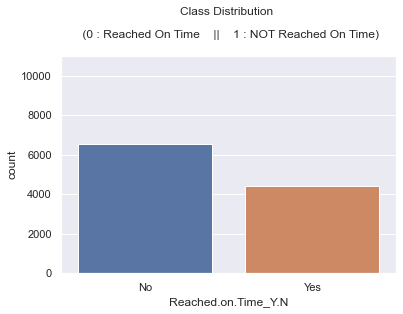

In [435]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Reached.on.Time_Y.N", data=train_df)
plt.ylim(0, train_df.shape[0])
plt.title('Class Distribution \n\n (0 : Reached On Time    ||    1 : NOT Reached On Time)\n')
print()

In [436]:
Not_Reached = round(train_df["Reached.on.Time_Y.N"].value_counts()[1]/len(train_df) * 100, 2)
Reached = round(train_df["Reached.on.Time_Y.N"].value_counts()[0]/len(train_df) * 100, 2)

print('NOT Reached On Time : {} % of the dataset'.format(Not_Reached))
print('Reached On Time : {} % of the dataset'.format(Reached))

NOT Reached On Time : 40.33 % of the dataset
Reached On Time : 59.67 % of the dataset


so the data set is almost balanced, if you order something then there is 59.67% chance that it will not reach on time 

# Problem Statement 2

- They also want to know, if their shipments are reaching on time to their best customers who have a :
1. Good customer rating.
2. Good customer score.
3. Make recurring orders.
4. Highest payment buyers

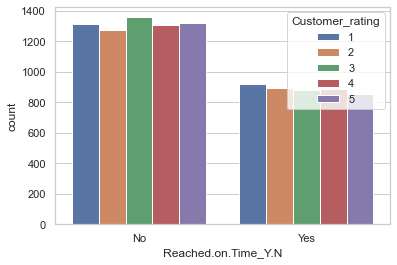

In [442]:
ax = sns.countplot(x="Reached.on.Time_Y.N", hue="Customer_rating", data=train_df)

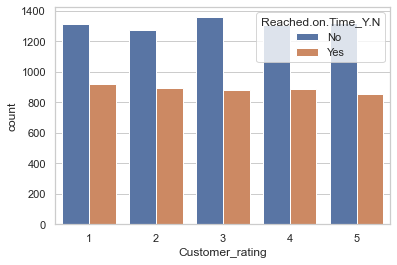

In [443]:
ax = sns.countplot(x="Customer_rating", hue="Reached.on.Time_Y.N", data=train_df)

Customer rating has no effect on delivery of the product

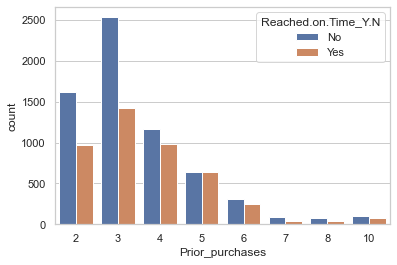

In [444]:
ax = sns.countplot(x="Prior_purchases", hue="Reached.on.Time_Y.N", data=train_df)

if customer has more prior purchases then there is slightly higher chance that it will deliver on time

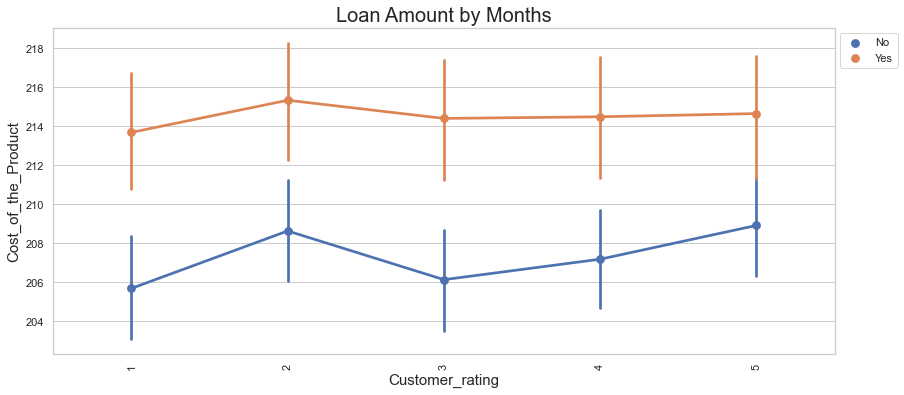

In [448]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='Customer_rating', y='Cost_of_the_Product',data=train_df, hue='Reached.on.Time_Y.N')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Customer_rating", fontsize=15)
g.set_ylabel("Cost_of_the_Product", fontsize=15)

g.set_title("Loan Amount by Months", fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

plt.show()

product with high cost are deliverd to the customer on time 

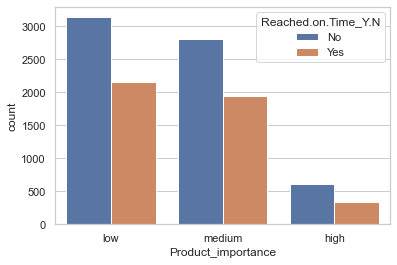

In [449]:
ax = sns.countplot(x="Product_importance", hue="Reached.on.Time_Y.N", data=train_df)

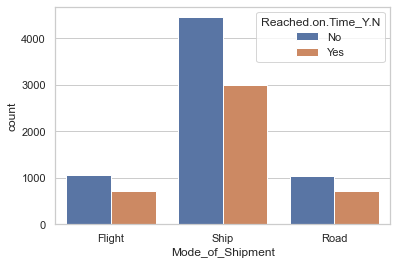

In [450]:
ax = sns.countplot(x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", data=train_df)

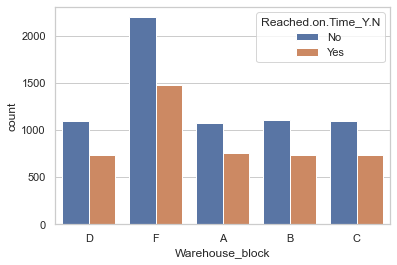

In [451]:
ax = sns.countplot(x="Warehouse_block", hue="Reached.on.Time_Y.N", data=train_df)

In [ ]:
ax = sns.countplot(x="Warehouse_block", hue="Reached.on.Time_Y.N", data=train_df)

In [440]:
def boxplot(df,width=20,height=200):
    """
    Objective
    ----------
    Draw a box plot to show distributions, skiping all the object variables
    (adjust the width and height to get best possible result)
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    width: int
        width for box plot
    height: int
        height for box plot
        
    returns
    ----------
    matplotlib Axes
    Returns the Axes object with the plot drawn onto it.   
    """
    sns.set_theme(style="darkgrid")
    
    cols = list(df.select_dtypes(["float64","int64"]).columns)
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(len(cols),figsize=(width,height))
    
    
    for i, col in enumerate(cols):
        sns.boxplot(df[col] , ax = axs[i])

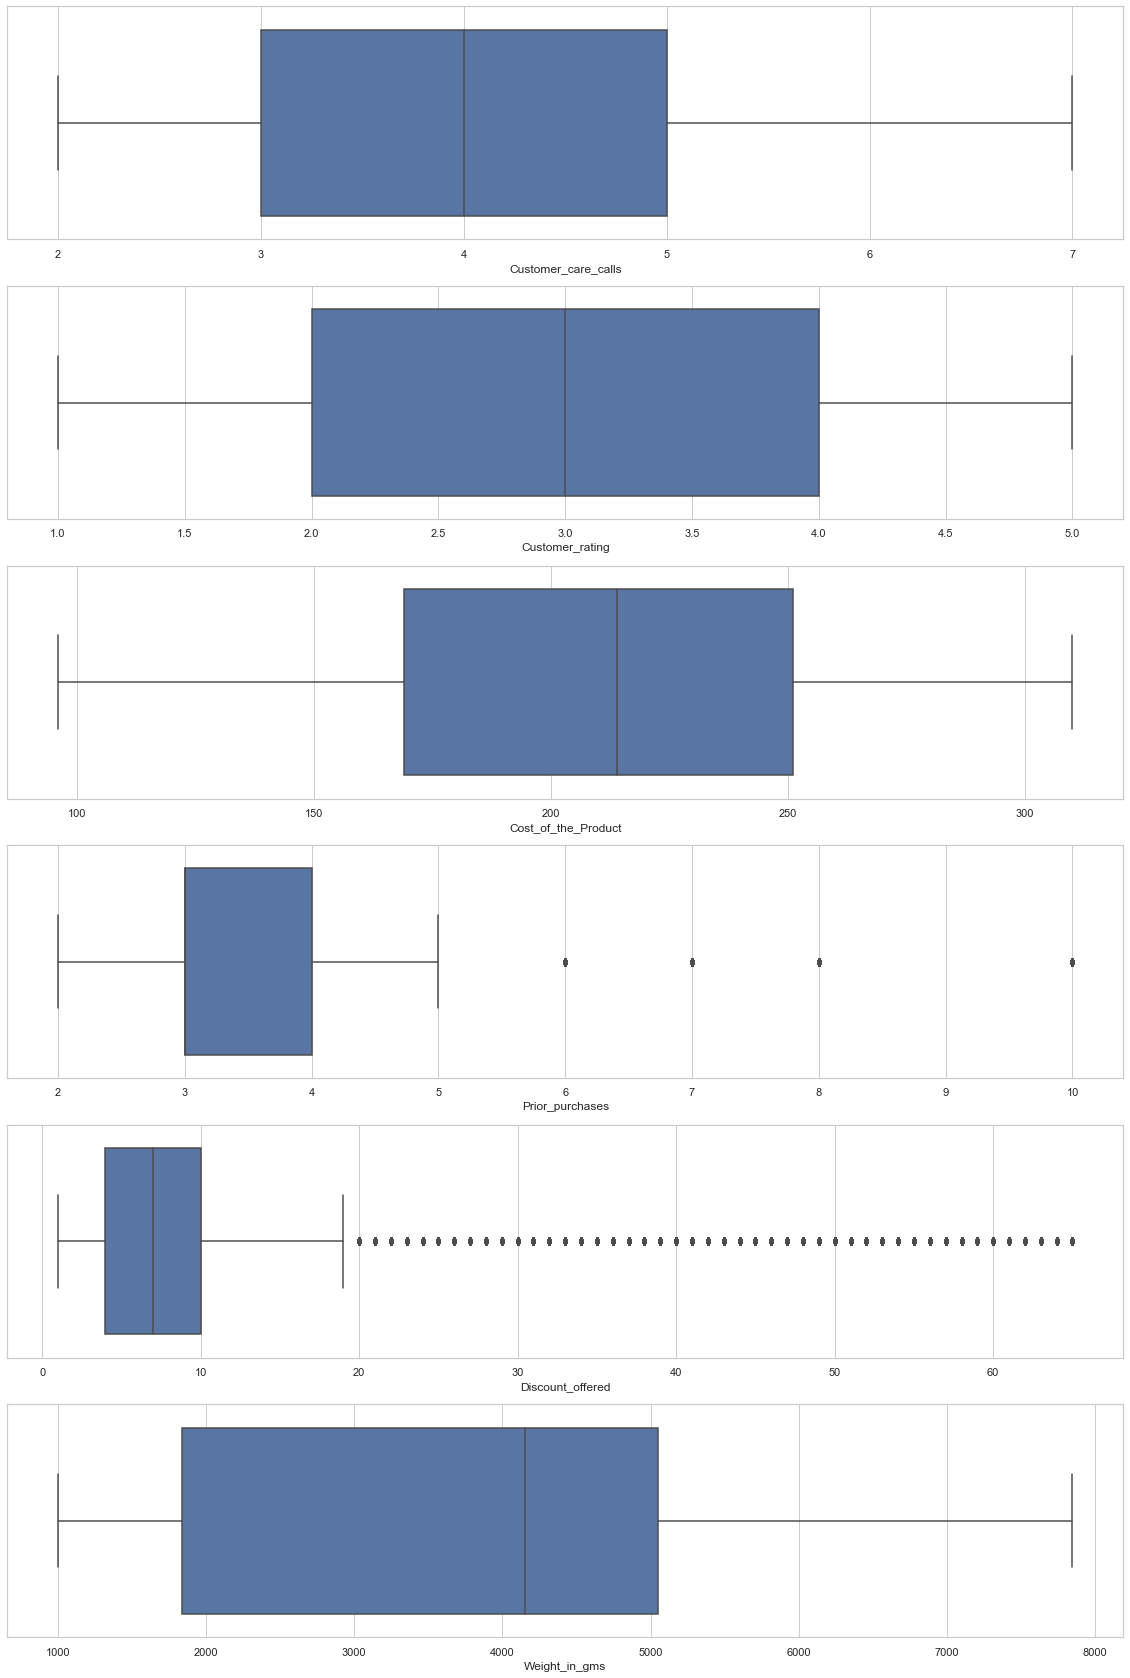

In [441]:
boxplot(train_df.iloc[:,:-1], width=20, height=30)

two variables prior purchases and discounted offers has outlier present

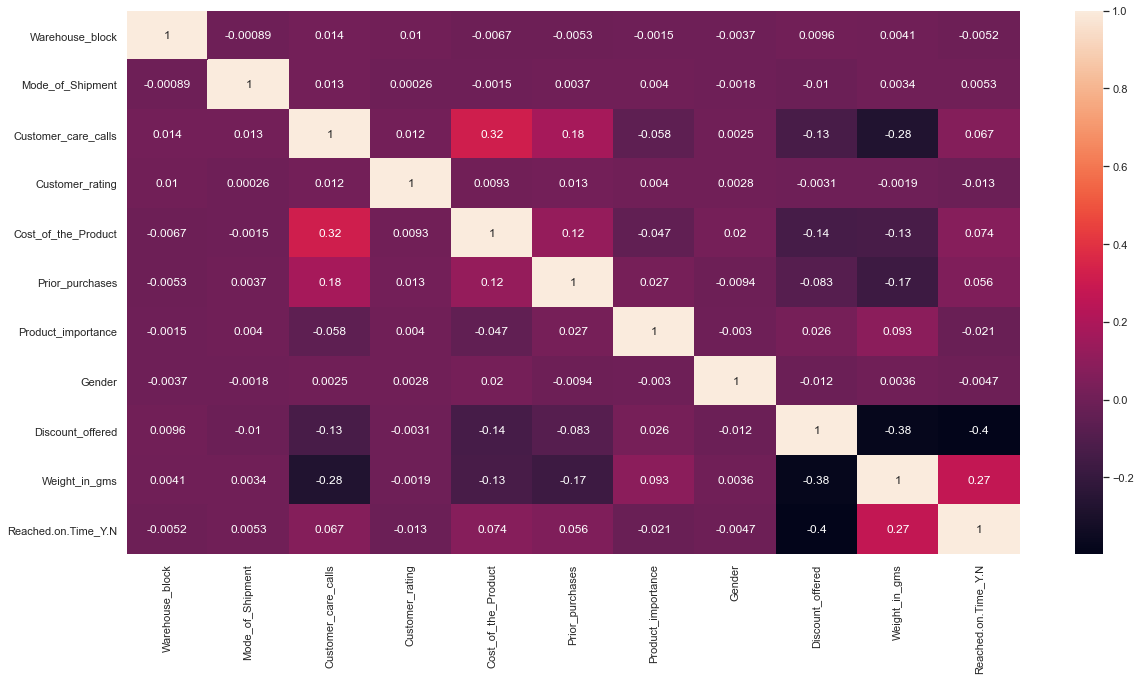

In [584]:
#Using Pearson Correlation

plt.figure(figsize=(20,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

## Data Preprocessing

### categories of each column

In [453]:
for i in train_df.columns:
    print("######  " , i , "  ######")
    print(train_df[i].value_counts())
    print()

######   Warehouse_block   ######
F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

######   Mode_of_Shipment   ######
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

######   Customer_care_calls   ######
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

######   Customer_rating   ######
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

######   Cost_of_the_Product   ######
245    110
257    109
260    106
254    101
264    100
      ... 
99       5
107      5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64

######   Prior_purchases   ######
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

######   Product_importance   ######
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

###### 

### Mnaual label Encoding

In [454]:
# Reached.On.Time
train_df["Reached.on.Time_Y.N"].value_counts()

No     6563
Yes    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [455]:
train_df["Reached.on.Time_Y.N"] = train_df["Reached.on.Time_Y.N"].map({"Yes":1,"No":0})

In [456]:
# warehouse block

train_df["Warehouse_block"].value_counts()

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64

In [457]:
wb ={"A":1, "B":2, "C":3, "D":4, "F":5}

In [458]:
# label encoding for warehouse block on train and test data
train_df["Warehouse_block"] =  train_df["Warehouse_block"].map(wb)
test_df["Warehouse_block"] =  test_df["Warehouse_block"].map(wb)

In [459]:
train_df["Warehouse_block"].value_counts()

5    3666
4    1834
3    1833
2    1833
1    1833
Name: Warehouse_block, dtype: int64

In [460]:
# Mode of shipment
train_df["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [461]:
ms = {"Ship":1,"Flight":2,"Road":3}

In [462]:
# label encoding for warehouse block on train and test data
train_df["Mode_of_Shipment"] = train_df["Mode_of_Shipment"].map(ms)
test_df["Mode_of_Shipment"] = test_df["Mode_of_Shipment"].map(ms)

In [463]:
train_df["Mode_of_Shipment"].value_counts()

1    7462
2    1777
3    1760
Name: Mode_of_Shipment, dtype: int64

In [464]:
# Product importance
train_df["Product_importance"].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [465]:
pi = {"low":1, "medium":2, "high":3}

In [466]:
# label encoding for warehouse block on train and test data
train_df["Product_importance"] =  train_df["Product_importance"].map(pi)
test_df["Product_importance"] =  test_df["Product_importance"].map(pi)

In [467]:
train_df["Product_importance"].value_counts()

1    5297
2    4754
3     948
Name: Product_importance, dtype: int64

In [468]:
# Gender
train_df["Gender"].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [469]:
ge = {"F":0,"M":1}

In [470]:
# label encoding for warehouse block on train and test data
train_df["Gender"] =  train_df["Gender"].map(ge)
test_df["Gender"] =  test_df["Gender"].map(ge)

In [471]:
train_df["Gender"].value_counts()

0    5545
1    5454
Name: Gender, dtype: int64

In [474]:
train_df.head(10) # all categorical labes are manually encoded for train data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,4,2,177,3,1,0,44,1233,0
1,5,2,4,5,216,2,1,1,59,3088,0
2,1,2,2,2,183,4,1,1,48,3374,0
3,2,2,3,3,176,4,2,1,10,1177,0
4,3,2,2,2,184,3,2,0,46,2484,0
5,5,2,3,1,162,3,2,0,12,1417,0
6,4,2,3,4,250,3,1,0,3,2371,0
7,5,2,4,1,233,2,1,0,48,2804,0
8,1,2,3,4,150,3,1,0,11,1861,0
9,2,2,3,2,164,3,2,0,29,1187,0


In [475]:
test_df.head(10) # all categorical labes are manually encoded for test data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,3,4,168,3,1,1,5,1841
1,2,3,5,3,159,2,1,0,58,1990
2,3,3,2,2,282,3,2,0,42,3193
3,5,3,4,3,278,4,3,1,37,3248
4,4,3,6,4,256,5,1,0,6,3149
5,5,3,4,1,97,4,2,0,17,1204
6,1,3,2,1,136,3,3,0,35,1801
7,2,3,4,5,128,4,2,0,7,1940
8,3,3,3,5,114,3,3,1,3,1974
9,5,3,2,1,137,4,2,0,4,1185


### shuffling the data

In [478]:
# shuffle the train dataset
df = train_df.sample(frac=1).reset_index(drop=True)

In [479]:
df.head(10) 

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,5,1,2,4,122,2,1,0,32,1213,0
1,5,2,4,4,255,6,1,0,9,1322,1
2,3,1,6,4,306,4,1,0,5,1703,0
3,3,1,6,3,297,4,2,1,2,1954,1
4,5,1,5,4,199,2,3,0,20,2553,0
5,5,3,5,5,223,6,2,0,10,1711,1
6,1,3,4,5,163,3,2,0,2,4887,1
7,2,1,3,5,141,2,2,0,9,5000,1
8,4,1,2,1,166,3,2,0,8,4255,0
9,2,1,4,2,269,5,1,0,45,2383,0


### Label Split

In [482]:
X = df.loc[: , df.columns != "Reached.on.Time_Y.N"]
y = df["Reached.on.Time_Y.N"]

In [483]:
X.shape

(10999, 10)

In [484]:
y

0        0
1        1
2        0
3        1
4        0
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

### Data Partition

In [490]:
from sklearn.model_selection import train_test_split

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [492]:
print("dataframe shape {}".format(df.shape))
print()
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))

dataframe shape (10999, 11)

X_train shape : (7369, 10)
X_test shape : (3630, 10)
y_train shape : (7369,)
y_test shape : (3630,)


In [493]:
y_train.value_counts()

0    4413
1    2956
Name: Reached.on.Time_Y.N, dtype: int64

In [494]:
y_test.value_counts()

0    2150
1    1480
Name: Reached.on.Time_Y.N, dtype: int64

### Normalization

In [500]:
def feature_scaling(X_train, X_test, method = "StandardScaler", return_df = False):
    """
    Objective
    ----------
    performs normalization or Standardization on input dataset 
    for feature scaling
    
    parameters
    ----------
    X_train: pandas dataframe
        all independent features in dataframe for training 
    
    X_test: pandas dataframe
        all independent features in dataframe for testing

    method : str , options "StandardScaler" or "MinMax" (dfault="StandardScaler")
        type of method to perform feature scaling
        "StandardScaler" is used for standardization
        and "MinMax" is used for Normalization
    
    return_df : bool (defualt=False)
        True will return the output in pandas Dataframe format
        False will return the output in array format

    returns 
    ----------
     X_train_scale, X_test_scale , scale  object
        return sclae data in array or dataframe format
        
    """
    if method == "StandardScaler":
        
        sc = StandardScaler()
        
        if return_df:
        
            # return data frame format
            X_train_scale = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
            X_test_scale = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

            return X_train_scale , X_test_scale, sc
        else:
            
            # return array format
            X_train_scale =sc.fit_transform(X_train)
            X_test_scale =sc.transform(X_test)
            
            return X_train_scale , X_test_scale, sc
    
    elif method =="MinMax":
        
        mm_scaler = MinMaxScaler()
        
        if return_df:
        
            # return data frame format
            X_train_scale = pd.DataFrame(mm_scaler.fit_transform(X_train),columns=X_train.columns)
            X_test_scale = pd.DataFrame(mm_scaler.transform(X_test),columns=X_test.columns)

            return X_train_scale , X_test_scale, mm_scaler
        else:
            
            # return array format
            X_train_scale =mm_scaler.fit_transform(X_train)
            X_test_scale =mm_scaler.transform(X_test)
            
            return X_train_scale , X_test_scale , mm_scaler

In [501]:
X_train_scale, X_test_scale , ss = feature_scaling(X_train, X_test, method = "MinMax", return_df = True)

In [502]:
X_train_scale.head(10) # scale data using MinMax method in DataFrame Format

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1.00,0.0,0.2,0.25,0.500000,0.000,0.5,0.0,0.593750,0.415486
1,0.75,0.5,0.8,0.25,0.911215,0.250,0.0,1.0,0.109375,0.002630
2,0.00,0.0,0.4,0.00,0.219626,0.125,0.5,0.0,0.421875,0.028634
3,0.25,1.0,0.2,0.25,0.345794,0.000,0.0,1.0,0.015625,0.469394
4,0.50,0.0,0.4,0.50,0.457944,0.000,0.5,1.0,0.046875,0.698174
5,1.00,1.0,0.2,0.25,0.481308,0.000,0.5,0.0,0.093750,0.661797
6,1.00,0.0,0.6,1.00,0.635514,0.125,0.0,1.0,0.046875,0.104456
7,0.00,0.0,0.0,1.00,0.705607,0.250,0.5,1.0,0.046875,0.621476
8,1.00,0.0,0.4,0.50,0.822430,0.125,0.0,0.0,0.046875,0.679766
9,0.25,0.0,0.6,0.50,0.439252,0.125,1.0,1.0,0.687500,0.237692


In [503]:
X_train_scale, X_test_scale , ss = feature_scaling(X_train, X_test, method = "MinMax", return_df = False)

In [504]:
X_train_scale #  scale data using MinMax method in Array Format

array([[1.        , 0.        , 0.2       , ..., 0.        , 0.59375   ,
        0.41548576],
       [0.75      , 0.5       , 0.8       , ..., 1.        , 0.109375  ,
        0.00262966],
       [0.        , 0.        , 0.4       , ..., 0.        , 0.421875  ,
        0.02863404],
       ...,
       [0.5       , 0.        , 0.2       , ..., 1.        , 0.65625   ,
        0.02878013],
       [0.75      , 0.        , 0.        , ..., 0.        , 0.046875  ,
        0.56406136],
       [0.75      , 0.        , 0.6       , ..., 0.        , 0.171875  ,
        0.3504748 ]])

# Problem Statement 1

- As a Data Scientist, they want you to build a model to predict if the shipments are or will reach on time or not.
For this, they want you to use various Logit/Probabilistic techniques with the most accurate model. The main models
they want you to build and compare the accuracy are:
    
1. Logistic Regression
2. Support Vector Machines
3. Random Forest
4. XgBoost or any other boosting technique.

## Model Building

In [505]:
# Helper function to plot cunfusion matrix and classification report 

def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

    
    

### Logistic Regression

In [508]:
from sklearn.linear_model import LogisticRegression

Logisitic_Model = LogisticRegression()

# fitting training data to the model
Logisitic_Model.fit(X_train_scale, y_train)

LogisticRegression()

In [509]:
# Prediction on test data

y_pred = Logisitic_Model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


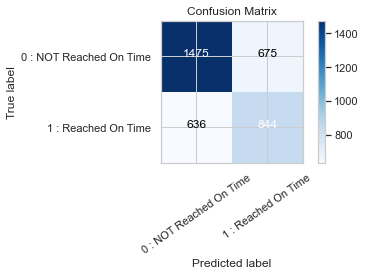

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      2150
           1       0.56      0.57      0.56      1480

    accuracy                           0.64      3630
   macro avg       0.63      0.63      0.63      3630
weighted avg       0.64      0.64      0.64      3630

Accuracy of the model:  0.6388429752066116


In [510]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

In [535]:
from sklearn.metrics import roc_curve, auc

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

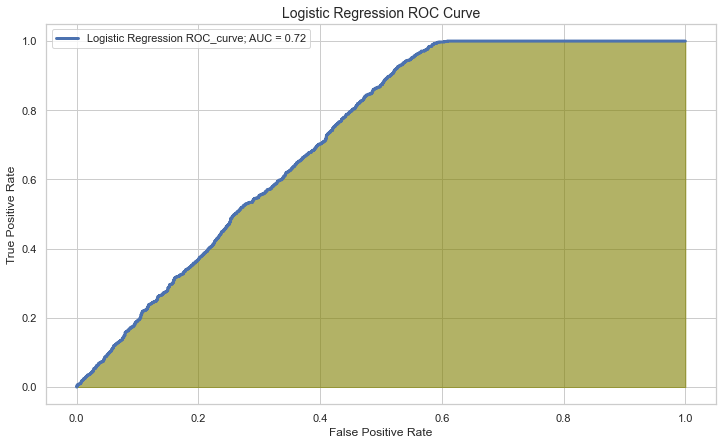

In [538]:
# Get ROC curve and AUC.
y_hat_proba = Logisitic_Model.predict_proba(X_test_scale)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curve and AUC for our logistic regression model.
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(lr_fpr, lr_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(lr_fpr, lr_tpr, linewidth=3, label='Logistic Regression ROC_curve; AUC = %0.2f' % lr_roc_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', size=14)

### Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_Model = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
DecisionTree_Model.fit(X_train_scale,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=8, random_state=0)

In [241]:
#fit the model on the data and predict the values 

y_pred = DecisionTree_Model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


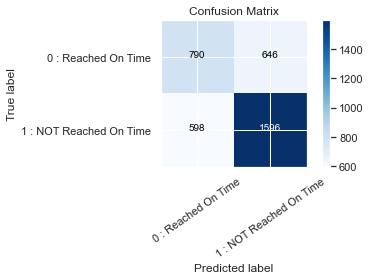

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1436
           1       0.71      0.73      0.72      2194

    accuracy                           0.66      3630
   macro avg       0.64      0.64      0.64      3630
weighted avg       0.66      0.66      0.66      3630

Accuracy of the model:  0.6573002754820937


In [242]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

Text(0.5, 1.0, 'DecisionTree ROC Curve')

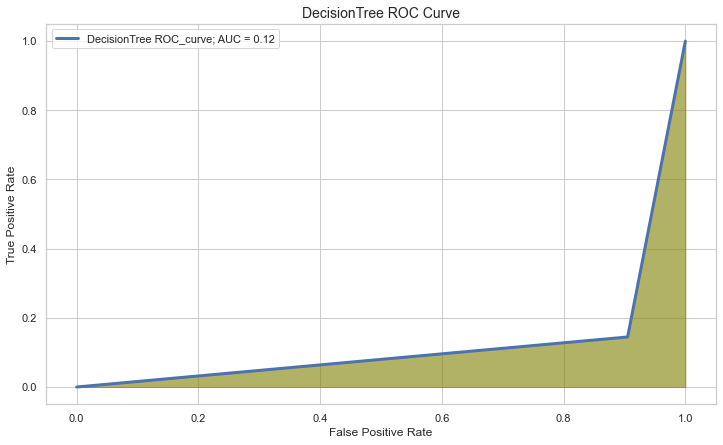

In [539]:
# Get ROC curve and AUC.
y_hat_proba = DecisionTree_Model.predict_proba(X_test_scale)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curve and AUC for our logistic regression model.
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(lr_fpr, lr_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(lr_fpr, lr_tpr, linewidth=3, label='DecisionTree ROC_curve; AUC = %0.2f' % lr_roc_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree ROC Curve', size=14)

### Random Forest

In [514]:
from sklearn.ensemble._forest import RandomForestClassifier

In [515]:
RandomForest_Model = RandomForestClassifier(min_samples_split=15,
                       max_depth=15,
                       max_features='auto',
                       n_estimators=500,
                       random_state=42,
                       min_samples_leaf=1)

RandomForest_Model.fit(X_train_scale, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=500,
                       random_state=42)

In [518]:
#fit the model on the data and predict the values 

y_pred = RandomForest_Model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


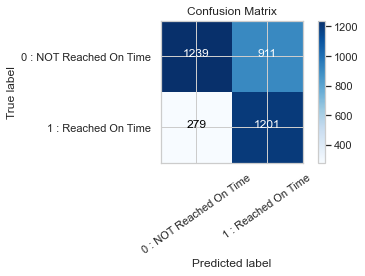

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      2150
           1       0.57      0.81      0.67      1480

    accuracy                           0.67      3630
   macro avg       0.69      0.69      0.67      3630
weighted avg       0.72      0.67      0.67      3630

Accuracy of the model:  0.6721763085399449


In [519]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

Text(0.5, 1.0, 'Random Forest ROC Curve')

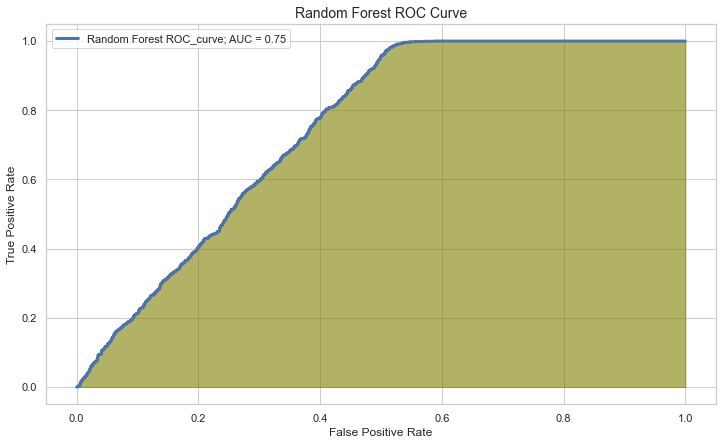

In [541]:
# Get ROC curve and AUC.
y_hat_proba = RandomForest_Model.predict_proba(X_test_scale)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curve and AUC for our logistic regression model.
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(lr_fpr, lr_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(lr_fpr, lr_tpr, linewidth=3, label='Random Forest ROC_curve; AUC = %0.2f' % lr_roc_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', size=14)

### Gradient Boosting 

In [520]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

GradientBoosting_Model =GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
GradientBoosting_Model.fit(X_train_scale,y_train)

y_pred = GradientBoosting_Model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


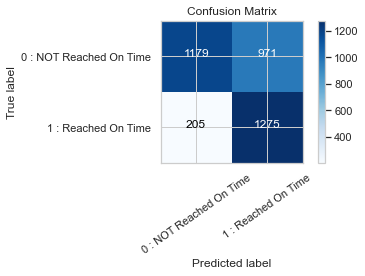

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.85      0.55      0.67      2150
           1       0.57      0.86      0.68      1480

    accuracy                           0.68      3630
   macro avg       0.71      0.70      0.68      3630
weighted avg       0.74      0.68      0.67      3630

Accuracy of the model:  0.6760330578512397


In [521]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

Text(0.5, 1.0, 'GradientBoosting ROC Curve')

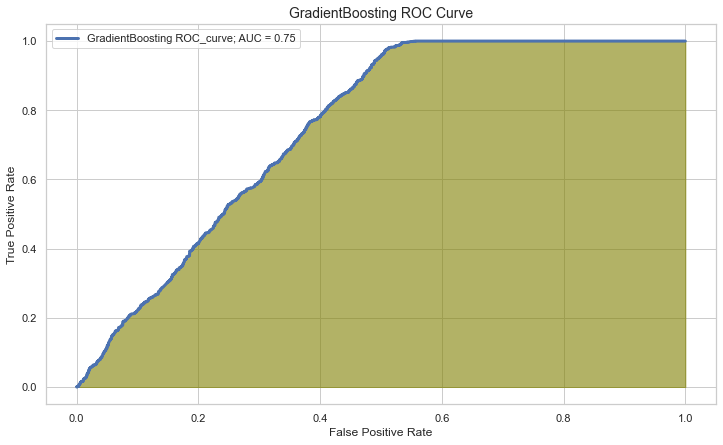

In [543]:
# Get ROC curve and AUC.
y_hat_proba = GradientBoosting_Model.predict_proba(X_test_scale)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curve and AUC for our logistic regression model.
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(lr_fpr, lr_tpr, 0, color='Olive', alpha=0.6)
ax1 = plt.plot(lr_fpr, lr_tpr, linewidth=3, label='GradientBoosting ROC_curve; AUC = %0.2f' % lr_roc_auc)
plt.legend(loc='upper left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoosting ROC Curve', size=14)

### KNN

In [527]:
# Classify with K-NN.
from sklearn.neighbors._classification import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()

KNN_Model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [528]:
# Make predictions based on our best model.
y_pred = KNN_Model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


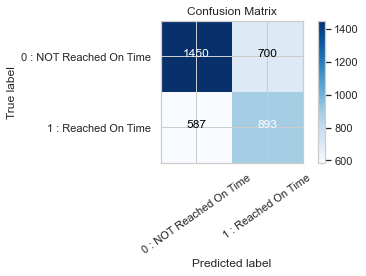

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2150
           1       0.56      0.60      0.58      1480

    accuracy                           0.65      3630
   macro avg       0.64      0.64      0.64      3630
weighted avg       0.65      0.65      0.65      3630

Accuracy of the model:  0.6454545454545455


In [529]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

### Suport Vector 

In [531]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)

svc_model.fit(X_train_scale, y_train)

SVC(gamma=0.1)

In [532]:
y_pred = svc_model.predict(X_test_scale)

Confusion Matrix, Without Normalisation


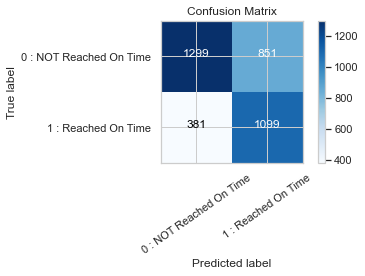

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.77      0.60      0.68      2150
           1       0.56      0.74      0.64      1480

    accuracy                           0.66      3630
   macro avg       0.67      0.67      0.66      3630
weighted avg       0.69      0.66      0.66      3630

Accuracy of the model:  0.6606060606060606


In [533]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, y_pred,label)

## ANN

In [544]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [552]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 10))


# # Adding the second hidden layer 
# classifier.add(Dense(units=8, kernel_initializer='uniform',
#                      activation='relu'))

# # dropout for second layer 
# classifier.add(Dropout(0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=8, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [553]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [554]:
# Fitting the ANN to the Training set

classifier.fit(X_train_scale,y_train, batch_size = 24, epochs = 50)

Train on 7369 samples
Epoch 1/50
7369/7369 [==============================] - 1s 76us/sample - loss: 0.6707 - accuracy: 0.5998
Epoch 2/50
7369/7369 [==============================] - 0s 37us/sample - loss: 0.5980 - accuracy: 0.6200
Epoch 3/50
7369/7369 [==============================] - 0s 40us/sample - loss: 0.5477 - accuracy: 0.6499
Epoch 4/50
7369/7369 [==============================] - 0s 51us/sample - loss: 0.5367 - accuracy: 0.6522
Epoch 5/50
7369/7369 [==============================] - 0s 46us/sample - loss: 0.5320 - accuracy: 0.6552
Epoch 6/50
7369/7369 [==============================] - 0s 46us/sample - loss: 0.5295 - accuracy: 0.6575
Epoch 7/50
7369/7369 [==============================] - 0s 46us/sample - loss: 0.5274 - accuracy: 0.6567
Epoch 8/50
7369/7369 [==============================] - 0s 54us/sample - loss: 0.5268 - accuracy: 0.6588
Epoch 9/50
7369/7369 [==============================] - 0s 53us/sample - loss: 0.5254 - accuracy: 0.6595
Epoch 10/50
7369/7369 [==========

In [558]:

# Predicting the Test set results
y_pred = classifier.predict(X_test_scale)

In [559]:
Y_pred = (y_pred > 0.5)  # 0.8 > 0.5 =T == 1

Confusion Matrix, Without Normalisation


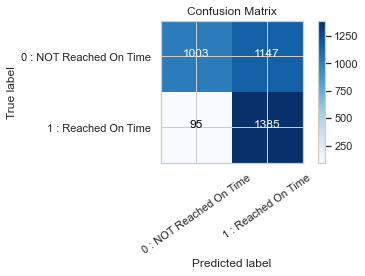

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.91      0.47      0.62      2150
           1       0.55      0.94      0.69      1480

    accuracy                           0.66      3630
   macro avg       0.73      0.70      0.65      3630
weighted avg       0.76      0.66      0.65      3630

Accuracy of the model:  0.6578512396694215


In [560]:
# Plot confusion Matrix

label = ["0 : NOT Reached On Time" , "1 : Reached On Time"]
plot_confusion_metrix(y_test, Y_pred,label)

In [572]:
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,5,1,2,4,122,2,1,0,32,1213
1,5,2,4,4,255,6,1,0,9,1322
2,3,1,6,4,306,4,1,0,5,1703
3,3,1,6,3,297,4,2,1,2,1954
4,5,1,5,4,199,2,3,0,20,2553
...,...,...,...,...,...,...,...,...,...,...
10994,1,1,2,5,166,4,2,0,3,4638
10995,5,1,4,1,181,3,2,1,38,3258
10996,1,1,3,4,176,3,1,0,4,1095
10997,5,2,5,3,238,5,1,1,1,1871


In [574]:
test_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,3,4,168,3,1,1,5,1841
1,2,3,5,3,159,2,1,0,58,1990
2,3,3,2,2,282,3,2,0,42,3193
3,5,3,4,3,278,4,3,1,37,3248
4,4,3,6,4,256,5,1,0,6,3149
...,...,...,...,...,...,...,...,...,...,...
3988,4,3,2,3,138,3,2,1,12,6755
3989,5,3,2,1,143,3,1,1,7,1862
3990,1,3,2,2,129,3,2,0,42,6999
3991,2,3,2,1,158,3,1,0,3,1093


In [575]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X_scale = scaler.transform(X)

test_scale = scaler.transform(test_df)

In [576]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_scale,y)

GradientBoostingClassifier(n_estimators=130)

In [581]:
y_test_pred = model_GradientBoosting.predict(test_scale)

# Problem Statement 3
- They want you to create a customer segmentation using clustering algorithm of the customers to whom the
shipments are not reaching on time.

Hint: Use only delayed customers data for clustering.

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,4,2,177,3,1,0,44,1233,1
1,5,2,4,5,216,2,1,1,59,3088,1
2,1,2,2,2,183,4,1,1,48,3374,1
3,2,2,3,3,176,4,2,1,10,1177,1
4,3,2,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10985,5,1,5,1,229,5,1,0,10,1040,1
10986,4,1,4,5,255,5,2,1,5,1458,1
10987,5,1,5,3,242,5,1,0,10,1846,1
10991,5,1,5,2,261,5,2,1,9,1227,1


In [341]:
# extract delayed customer
delayed_df = train_df[train_df["Reached.on.Time_Y.N"] == 1 ]

In [343]:
delayed_df = delayed_df.drop("Reached.on.Time_Y.N", axis=1)

In [344]:
delayed_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,4,2,4,2,177,3,1,0,44,1233
1,5,2,4,5,216,2,1,1,59,3088
2,1,2,2,2,183,4,1,1,48,3374
3,2,2,3,3,176,4,2,1,10,1177
4,3,2,2,2,184,3,2,0,46,2484
...,...,...,...,...,...,...,...,...,...,...
10985,5,1,5,1,229,5,1,0,10,1040
10986,4,1,4,5,255,5,2,1,5,1458
10987,5,1,5,3,242,5,1,0,10,1846
10991,5,1,5,2,261,5,2,1,9,1227


In [345]:
from sklearn.cluster import KMeans

In [346]:
# statistics of the data
delayed_df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
count,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000
mean,3.339784,1.478287,3.991467,3.005790,207.289197,3.498095,1.615420,0.497791,18.663721,3272.640104
std,1.487440,0.751678,1.122592,1.412692,48.054876,1.517285,0.651507,0.500033,19.108797,1576.148391
min,1.000000,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000,1.000000,1001.000000
25%,2.000000,1.000000,3.000000,2.000000,167.000000,3.000000,1.000000,0.000000,5.000000,1735.500000
50%,4.000000,1.000000,4.000000,3.000000,209.000000,3.000000,2.000000,0.000000,9.000000,3231.000000
75%,5.000000,2.000000,5.000000,4.000000,249.000000,4.000000,2.000000,1.000000,32.000000,4696.500000
max,5.000000,3.000000,7.000000,5.000000,310.000000,10.000000,3.000000,1.000000,65.000000,7846.000000


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Warehouse_block and Mode_of_Shipment have low magnitude whereas variables like Weight_in_gms and Cost_of_the_Product have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [347]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(delayed_df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03,6.563000e+03
mean,7.646211e-17,-4.469988e-16,-3.616874e-15,6.901889e-18,3.565976e-17,-1.123959e-15,-2.902515e-16,-3.022960e-17,-3.034260e-15,2.427841e-16
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-1.573147e+00,-6.363417e-01,-1.774125e+00,-1.419943e+00,-2.316054e+00,-9.874281e-01,-9.446809e-01,-9.955910e-01,-9.244468e-01,-1.441370e+00
25%,-9.007997e-01,-6.363417e-01,-8.832617e-01,-7.120211e-01,-8.384636e-01,-3.283058e-01,-9.446809e-01,-9.955910e-01,-7.151032e-01,-9.753252e-01
50%,4.438946e-01,-6.363417e-01,7.601453e-03,-4.098894e-03,3.560374e-02,-3.283058e-01,5.903379e-01,-9.955910e-01,-5.057596e-01,-2.642091e-02
75%,1.116242e+00,6.941173e-01,8.984646e-01,7.038233e-01,8.680489e-01,3.308165e-01,5.903379e-01,1.004429e+00,6.979662e-01,9.034482e-01
max,1.116242e+00,2.024576e+00,2.680191e+00,1.411745e+00,2.137528e+00,4.285551e+00,2.125357e+00,1.004429e+00,2.425051e+00,2.901826e+00


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [348]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters

In [349]:
# inertia on the fitted data
kmeans.inertia_

58206.39093894593

We got an inertia value of almost 58206. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

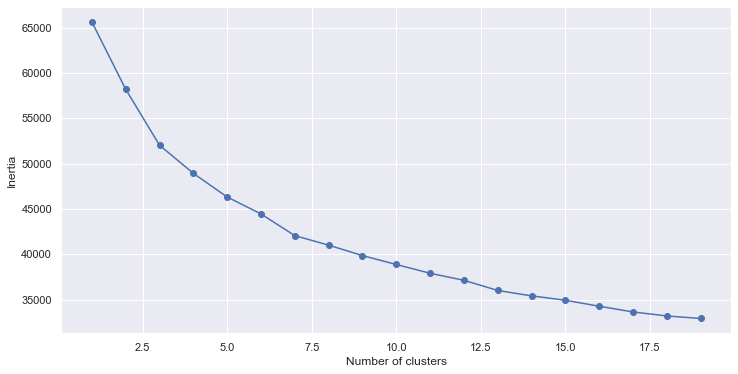

In [350]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

 Looking at the above elbow curve, we can choose any number of clusters between 13 to 16. Let’s set the number of clusters as 15 and fit the model:

In [351]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 15, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Finally, let’s look at the value count of points in each of the above-formed clusters:

In [352]:

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4     584
6     576
3     560
11    535
14    493
13    487
0     473
2     461
5     418
10    396
7     357
1     346
9     316
8     300
12    261
Name: cluster, dtype: int64

In [354]:
delayed_df.shape

(6563, 10)

so there are 6563 data points belonging to 15 diffrent clusters.

now lets visualize the cluster data in 2d space

In [356]:
frame

,0,1,2,3,4,5,6,7,8,9,cluster
0,0.443895,0.694117,0.007601,-0.712021,-0.630352,-0.328306,-0.944681,-0.995591,1.325997,-1.294165,1
1,1.116242,0.694117,0.007601,1.411745,0.181282,-0.987428,-0.944681,1.004429,2.111036,-0.117155,10
2,-1.573147,0.694117,-1.774125,-0.712021,-0.505486,0.330817,-0.944681,1.004429,1.535341,0.064313,11
3,-0.900800,0.694117,-0.883262,-0.004099,-0.651163,0.330817,0.590338,1.004429,-0.453424,-1.329697,11
4,-0.228453,0.694117,-1.774125,-0.712021,-0.484674,-0.328306,0.590338,-0.995591,1.430669,-0.500397,1
...,...,...,...,...,...,...,...,...,...,...,...
6558,1.116242,-0.636342,0.898465,-1.419943,0.451826,0.989939,-0.944681,-0.995591,-0.453424,-1.416624,13
6559,0.443895,-0.636342,0.007601,1.411745,0.992916,0.989939,0.590338,1.004429,-0.715103,-1.151401,0
6560,1.116242,-0.636342,0.898465,-0.004099,0.722371,0.989939,-0.944681,-0.995591,-0.453424,-0.905212,13
6561,1.116242,-0.636342,0.898465,-0.712021,1.117782,0.989939,0.590338,1.004429,-0.505760,-1.297972,0


In [357]:
from sklearn import manifold

In [358]:
tsne = manifold.TSNE(n_components=2, random_state=42) # we want to use only 2 dimention

In [366]:
array_frame = np.array(frame.iloc[:,:-1])

In [368]:
array_frame.shape

(6563, 10)

In [369]:
transformed_data = tsne.fit_transform(array_frame) # convert 10 feature info to two dimention for vis

In [362]:
transformed_data.shape

(6563, 2)

In [370]:
targets = np.array(frame["cluster"])

In [371]:
tsne = np.column_stack((transformed_data, targets))

In [372]:
tsne.shape

(6563, 3)

In [373]:
tsne_df =  pd.DataFrame(tsne, columns=["x","y","targets"])

In [374]:
tsne_df.head()

,x,y,targets
0,24.884144,23.483109,1.0
1,0.791251,-40.306358,10.0
2,-0.059328,-52.342541,11.0
3,-23.363613,-20.804379,11.0
4,6.864576,32.650112,1.0


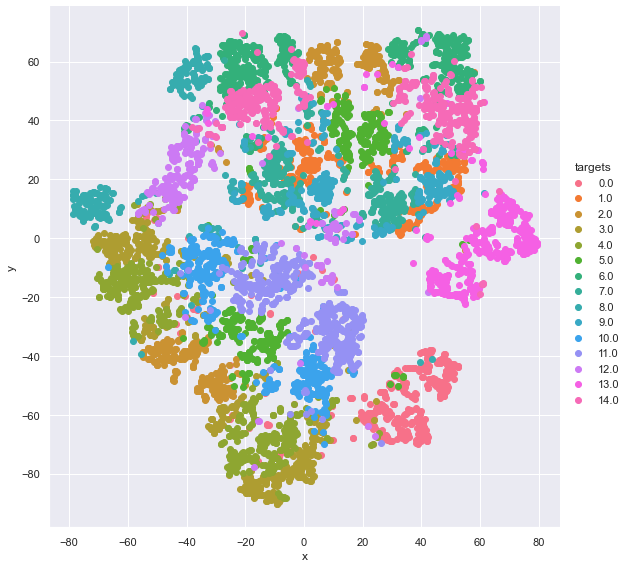

In [375]:
grid =  sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x","y").add_legend()

# Problem Statement 4

- Since the company also wants to start their operations in India, they want you to do a Sentiment analysis(Positive or Negative) of their competitors such as:

1. Amazon India
2. Flipkart
3. Snapdeal

In [300]:

# Pip install Tweepy if you don't already have the package
# !pip install tweepy

# Imports
import tweepy
import pandas as pd
import time
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [301]:
import nltk

In [302]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [303]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [304]:
sid = SentimentIntensityAnalyzer()

In [305]:

# keys and tokens from the Twitter Dev Console 
consumer_key = "1wJjd9jjUwrobLlwp1u4Ri8vs"
consumer_secret = "U4HrBz8nAczVnVQhHGcCTuxcNL7vxZpjj5DTld4ROGauJpC8tQ"
access_token = "1039066641995366401-20R1QVuFdwq4ydRygzHqzb7k6lkqdl"
access_token_secret = "0yfIaszIEPorQfIP8gu7Z9TkCmVGKEDssIjlFCiPxhWmw"

# attempt authentication 
try: 
    # create OAuthHandler object 
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    # set access token and secret 
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth,wait_on_rate_limit=True)
except: 
    print("Error: Authentication Failed") 

In [306]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [307]:
def get_tweet_sentiment(score): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    
    if score > 0: 
        return 'positive'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'negative'


Query by Text Search
Function is focused on completing the query then providing a CSV file of that query using pandas`

In [308]:
tweets = []

def text_query_to_csv(text_query,count):
    try:
        
        query = text_query + " " + "-filter:retweets"
        # Creation of query method using parameters
        tweets = tweepy.Cursor(api.search,q=query).items(count)

        # Pulling information from tweets iterable object
        tweets_list = [[ tweet.id, tweet.created_at, tweet.text] for tweet in tweets]
        
    
        # Creation of dataframe from tweets list
        # Add or remove columns as you remove tweet information
        tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Id', 'Datetime', 'tweet'])
        
        # clean tweet 
        tweets_df["clean_text"] = tweets_df["tweet"].apply(lambda tweet: clean_tweet(tweet))
        
        tweets_df["score"] = tweets_df["clean_text"].apply(lambda review:sid.polarity_scores(review))
        
        tweets_df["compound"] = tweets_df["score"].apply(lambda d:d["compound"])
        tweets_df["sentiment"] = tweets_df["compound"].apply(lambda  score : get_tweet_sentiment(score))
        
        del tweets_df["score"]
        del tweets_df["compound"]
        
      
        return tweets_df

    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

# Amazon India

In [309]:
amazon_india = text_query_to_csv("amazon india",3100)

In [311]:
amazon_india.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1331228629016068096,2020-11-24 13:30:12,Best OTTs in the market \n(1)Sony Liv\n(2)Amaz...,Best OTTs in the market 1 Sony Liv 2 Amazon pr...,positive
1,1331228278011482113,2020-11-24 13:28:49,@sanamkumar6504 @PranjalKamra PGIM India globa...,PGIM India global has around 97 allocation in ...,positive
2,1331228077796503552,2020-11-24 13:28:01,"@cgymuthu As we operate independently, please ...",As we operate independently please reach out t...,positive
3,1331227753908146176,2020-11-24 13:26:44,@AmazonHelp It's in amazon india,It s in amazon india,positive
4,1331224569668018176,2020-11-24 13:14:05,https://t.co/GgJrcinxKJ,,neutral
5,1331224285415817216,2020-11-24 13:12:57,@LGSBOTTOM TF is not available on Amazon India...,TF is not available on Amazon India and chrome...,positive
6,1331223782086721540,2020-11-24 13:10:57,"@vinayak_jain PUBG mobile, Cam Scanner are the...",jain PUBG mobile Cam Scanner are the top chine...,positive
7,1331223576171646976,2020-11-24 13:10:08,YOUR DAILY LOVE &amp; SAFETY REMINDER! #WearAM...,YOUR DAILY LOVE amp SAFETY REMINDER WearAMask ...,positive
8,1331223561487396866,2020-11-24 13:10:04,@SpigenWorld When @ Amazon India?,When Amazon India,positive
9,1331223487805984775,2020-11-24 13:09:47,@RahulReply @Musical_Ashaa Yes Amazon is bad f...,Ashaa Yes Amazon is bad for india,negative


In [312]:
amazon_india.to_csv('{}-tweets.csv'.format("amazon_india"), sep=',', index = False)

In [318]:
amazon_india.shape

(3100, 5)

# Flipkart

In [313]:
flipkart = text_query_to_csv("flipkart", 3100) # 15mins time to compelte

In [315]:
flipkart.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1331230678139080704,2020-11-24 13:38:21,"Congratulations to the winners of ""Campaign To...",Congratulations to the winners of Campaign To ...,positive
1,1331230658866266112,2020-11-24 13:38:16,@UShaikh10 @marathikolhapur @Flipkart @flipkar...,,neutral
2,1331230651043856386,2020-11-24 13:38:14,@jugzzzz @Flipkart @flipkartsupport @GoogleInd...,same here looks like they will never deliver,positive
3,1331230630638600192,2020-11-24 13:38:10,@delhivery Funny part is @Flipkart @flipkartsu...,Funny part is is not able to provide me the aw...,positive
4,1331230593573560332,2020-11-24 13:38:01,@akhterh72185199 To ensure that your Flipkart ...,To ensure that your Flipkart account informati...,positive
5,1331230548186992643,2020-11-24 13:37:50,@offensive_chy @Flipkart @flipkartsupport @ama...,chy same here looks like they will never deliver,positive
6,1331230500183105536,2020-11-24 13:37:38,Loot : Mast &amp; Harbour Watches @ 80% off\n\...,Loot Mast amp Harbour Watches 80 off Lowest pr...,negative
7,1331230459829702656,2020-11-24 13:37:29,@Flipkart dont fall in their trap. eaten my 26...,dont fall in their trap eaten my 2600 rupees a...,negative
8,1331230418805288960,2020-11-24 13:37:19,@TechnologyJock @Flipkart Lmao nice.,Lmao nice,positive
9,1331230366519050241,2020-11-24 13:37:07,@marathi8620 @marathikolhapur @Flipkart @flipk...,Tar tujhya bochat paey daalki,neutral


In [316]:
flipkart.to_csv('{}-tweets.csv'.format("flipkart"), sep=',', index = False)

In [317]:
flipkart.shape

(3100, 5)

# snapdeal

In [329]:
snapdeal = text_query_to_csv("snapdeal", 3100) # 15mins time to compelte

In [330]:
snapdeal.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1331240126278733824,2020-11-24 14:15:54,@narendramodi - Maybe you should also ban @Pay...,Maybe you should also ban com because they are...,negative
1,1331239881524326401,2020-11-24 14:14:55,@snapdeal I HAVE ORDER FOR DR MORPEN GLUCO MET...,I HAVE ORDER FOR DR MORPEN GLUCO METER BG03 VI...,negative
2,1331239122229284864,2020-11-24 14:11:54,@KIRITKUMABAGDAI We always request our custome...,We always request our customers to never share...,negative
3,1331239062137495552,2020-11-24 14:11:40,@KIRITKUMABAGDAI Hi! So sorry to disappoint yo...,Hi So sorry to disappoint you I ve shared this...,positive
4,1331238423923884033,2020-11-24 14:09:08,@snapdeal I HAD ORDERED FOR DR MORPEN GLUCO ME...,I HAD ORDERED FOR DR MORPEN GLUCO METER BG03 I...,negative
5,1331231190875992066,2020-11-24 13:40:23,Carry your home in your mobile phone.\n\nWelco...,Carry your home in your mobile phone Welcome t...,positive
6,1331229927325122560,2020-11-24 13:35:22,@Amandachamp01 @myntra @amazonIN @snapdeal I a...,I am just waiting for their reply if they won ...,positive
7,1331229529860239362,2020-11-24 13:33:47,@Manohar82286605 @Flipkart @flipkartsupport @F...,Bhai use kiya kar Flipkart Snapdeal sab chor h...,neutral
8,1331228539736129536,2020-11-24 13:29:51,This is very shameful for such a multi-billion...,This is very shameful for such a multi billion...,negative
9,1331217819258683394,2020-11-24 12:47:15,￼How Do Ecommerce Sites Offer Free Shipping | ...,How Do Ecommerce Sites Offer Free Shipping Eco...,positive


In [331]:
snapdeal.to_csv('{}-tweets.csv'.format("snapdeal"), sep=',', index = False)

---


For Amazon India...
Positive tweets percentage: 50.81 %
Negative tweets percentage: 17.0 %
Neutral tweets percentage: 32.19 %


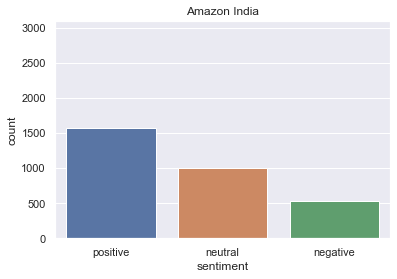

In [327]:
ax = sns.countplot(x="sentiment", data=amazon_india)
plt.ylim(0, amazon_india.shape[0])
plt.title("Amazon India")
print()

pos = round(amazon_india["sentiment"].value_counts()[0]/len(amazon_india) * 100, 2)
neu = round(amazon_india["sentiment"].value_counts()[1]/len(amazon_india) * 100, 2)
neg = round(amazon_india["sentiment"].value_counts()[2]/len(amazon_india) * 100, 2)
print("For Amazon India...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))


For flipkart ...
Positive tweets percentage: 38.42 %
Negative tweets percentage: 23.68 %
Neutral tweets percentage: 37.9 %


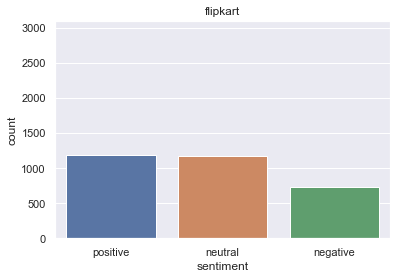

In [328]:
ax = sns.countplot(x="sentiment", data=flipkart)
plt.ylim(0, flipkart.shape[0])
plt.title("flipkart")
print()

pos = round(flipkart["sentiment"].value_counts()[0]/len(flipkart) * 100, 2)
neu = round(flipkart["sentiment"].value_counts()[1]/len(flipkart) * 100, 2)
neg = round(flipkart["sentiment"].value_counts()[2]/len(flipkart) * 100, 2)
print("For flipkart ...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))


For snapdeal ...
Positive tweets percentage: 59.09 %
Negative tweets percentage: 12.44 %
Neutral tweets percentage: 28.47 %


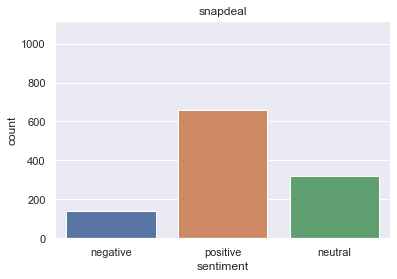

In [333]:
ax = sns.countplot(x="sentiment", data=snapdeal)
plt.ylim(0, snapdeal.shape[0])
plt.title("snapdeal")
print()

pos = round(snapdeal["sentiment"].value_counts()[0]/len(snapdeal) * 100, 2)
neu = round(snapdeal["sentiment"].value_counts()[1]/len(snapdeal) * 100, 2)
neg = round(snapdeal["sentiment"].value_counts()[2]/len(snapdeal) * 100, 2)
print("For snapdeal ...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))